# Feature Selection Project

<h3>We will answer the following questions.</h3>

    1. Which factor influenced a candidate in getting placed?
    2. Does percentage matters for one to get placed?
    3. Which degree specialisation is much demanded by corporate?
    
But for now, let us explore our data.

In [1]:
import pandas as pd
read_df = pd.read_csv('/home/slyson/Documents/Data Science/Projects/Datasets/Classification/Campus Recruitment/Placement_Data_Full_Class.csv')
read_df.info()

/home/slyson/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [2]:
read_df.keys()

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [3]:
read_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
import numpy as np
read_df.duplicated().sum()
read_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Let us check <i>r</i>, the relationship between <u>primary</u> and <u>high school</u> average percentage.

# Data Analysis

In [5]:
import matplotlib.pyplot as plt

In [6]:
read_df['ssc_p'].corr(read_df['hsc_p'])

0.5114721015997725

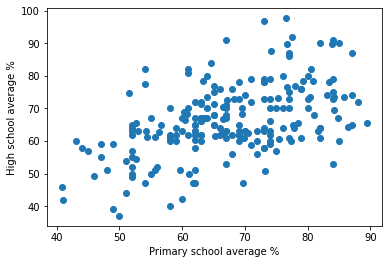

In [7]:
plt.scatter(read_df['ssc_p'],read_df['hsc_p'])
plt.xlabel('Primary school average %')
plt.ylabel('High school average %')
plt.show()

There is somewhat of a positive linear relationship between pass percentage in primary and high school.

In [8]:
read_df['etest_p'].corr(read_df['degree_p'])

0.2244701710269114

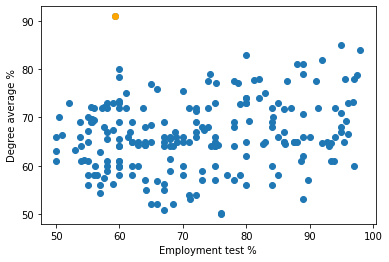

In [9]:
plt.scatter(read_df['etest_p'],read_df['degree_p'])
plt.scatter(read_df['etest_p'][197],read_df['degree_p'][197],c='orange')
plt.ylabel('Degree average %')
plt.xlabel('Employment test %')
plt.show()

In [10]:
print('The average employment test % is: ',np.around(read_df['etest_p'].mean(),2)
      ,'and the average degree % is',np.around(read_df['degree_p'].mean(),2))

The average employment test % is:  72.1 and the average degree % is 66.37


There are a few outliers, but none more obvious than the graduate with an exceptional 91% degree average and 59% employment percentage. It clear that there is little correlation between performance in university and readiness for work. 

Text(0, 0.5, 'MBA average %')

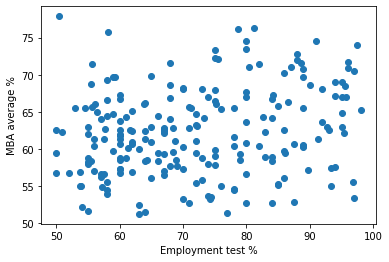

In [11]:
plt.scatter(read_df['etest_p'],read_df['mba_p'])
plt.xlabel('Employment test %')
plt.ylabel('MBA average %')

There is no noticeable variation in the two factors to comment about.

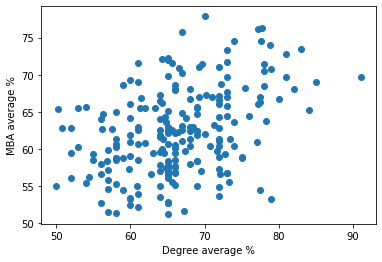

In [12]:
plt.scatter(read_df['degree_p'],read_df['mba_p'])
plt.xlabel('Degree average %')
plt.ylabel('MBA average %')
plt.show()

In [13]:
read_df['degree_p'].corr(read_df['mba_p'])

0.40236377062029166

There is a positive linear relationship between the two factors. It is similar to primary school and high school average percentages. Analysing specific and different individuals' journeys from primary until employment would be very interesting to see if there is consistence in performance or not but it would be a tideous task and we shall stick to group analysis because such a detailed analysis is unimportant to answering the questions asked.

What about the relationship between employment <u>status</u> and <u>university degree average percentage</u>? Let us find out.

In [14]:
placed = read_df[read_df['status']=='Placed']
not_placed = read_df[read_df['status']=='Not Placed']

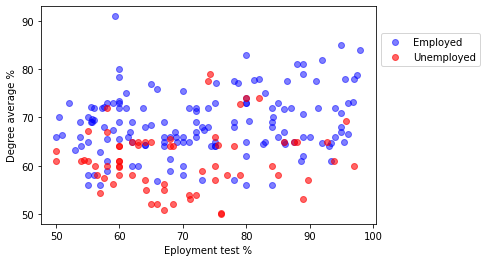

In [15]:
plt.scatter(placed['etest_p'],placed['degree_p'],c='blue',label='Employed',alpha=0.5)
plt.scatter(not_placed['etest_p'],not_placed['degree_p'],c='red',label='Unemployed',alpha=0.6)
plt.xlabel('Eployment test %')
plt.ylabel('Degree average %')
plt.legend(bbox_to_anchor=(1,0.9,0,0))
plt.show()

In [16]:
print('The average degree % for the employed: ',np.around(placed['degree_p'].mean(),2)
      ,'and the average employment test % for the employed: ',np.around(placed['etest_p'].mean(),2))
print('The average degree % for the unemployed: ',np.around(not_placed['degree_p'].mean(),2)
      , 'and the average employment test % for the unemployed: ',np.around(not_placed['etest_p'].mean(),2))

The average degree % for the employed:  68.74 and the average employment test % for the employed:  73.24
The average degree % for the unemployed:  61.13 and the average employment test % for the unemployed:  69.59


The difference between the two groups could not be more pronounced and while it is clear that there is little variability(<u>3.65% diff.</u>) in employability between the two groups, degree average(<u>7.61% diff.</u>), conversely, is more consequential to placement. It is also clear that recruiters choose based on academic merit than employability test %, in this case at least.

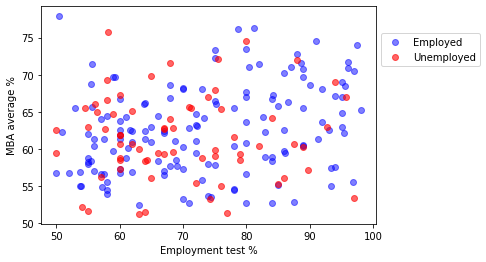

In [17]:
plt.scatter(placed['etest_p'],placed['mba_p'],label='Employed',c='blue',alpha=0.5)
plt.scatter(not_placed['etest_p'],not_placed['mba_p'],label='Unemployed',c='red',alpha=0.6)
plt.xlabel('Employment test %')
plt.ylabel('MBA average %')
plt.legend(bbox_to_anchor=(1,0.9,0,0))
plt.show()

These two factors have little noticeable variability inbetween them. It is worth noting that very few unemployed graduates have a high MBA average % and employment test % while a lot more employed graduates scored high in both factors. There are definitely more factors as we'll discover, that influence job placement, but a high MBA average % and a high employability test % are not emerging as being amongst the most influential ones.

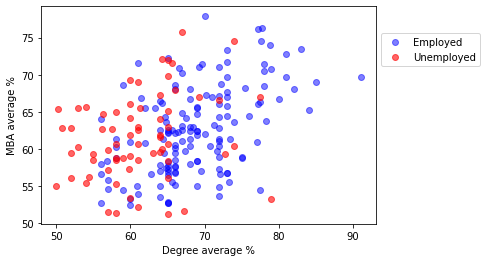

In [18]:
plt.scatter(placed['degree_p'],placed['mba_p'],label='Employed',c='blue',alpha=0.5)
plt.scatter(not_placed['degree_p'],not_placed['mba_p'],label='Unemployed',c='red',alpha=0.6)
plt.xlabel('Degree average %')
plt.ylabel('MBA average %')
plt.legend(bbox_to_anchor=(1,0.9,0,0))
plt.show()

In [19]:
np.around(placed['degree_p'].mean(),2),np.around(not_placed['degree_p'].mean(),2),np.around(placed['mba_p'].mean(),2),np.around(not_placed['mba_p'].mean(),2)

(68.74, 61.13, 62.58, 61.61)

This graph depicts the reasons for the employment status differences between the groups. Employed graduates on average have a higher(7.61% diff.) degree average % but a negligible(0.97%) difference in MBA average. <br>There are a few outlier from the unemployed group, graduates who have higher degree average percentage than the employed group and also a higher mba average than the employed group. 
<br>There are also a lot more employed graduates who have a lower degree average percentage than unemployed group and also a lower mba average % than the unemployed group, the majority of the graduates are very deserving of their placement status.

<br>So far, from what have learned the analysis we have just done is, it seems average degree percentage is the most influencial factor when it comes to placement. Let us try and see if there are any differences between the genders.

In [20]:
men = read_df[read_df['gender']=='M']
women = read_df[read_df['gender']=='F']

In [21]:
np.unique(men['status'],return_counts=True)

(array(['Not Placed', 'Placed'], dtype=object), array([ 39, 100]))

In [22]:
np.unique(women['status'],return_counts=True)

(array(['Not Placed', 'Placed'], dtype=object), array([28, 48]))

Men enjoy 71.94% employment, while only 63.158% of women are employed.<br>We cannot yet draw any conclusions.

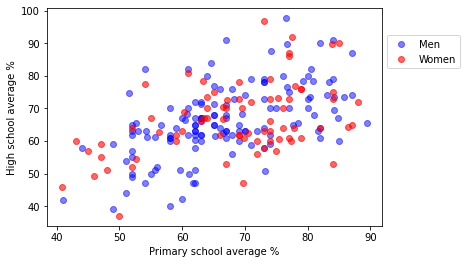

In [23]:
plt.scatter(men['ssc_p'],men['hsc_p'],label='Men',c='blue',alpha=0.5)
plt.scatter(women['ssc_p'],women['hsc_p'],label='Women',c='red',alpha=0.6)
plt.xlabel('Primary school average %')
plt.ylabel('High school average %')
plt.legend(bbox_to_anchor=(1,0.9,0,0))
plt.show()

We have seen from the previous comparison between primary and high school results that there is a positive linear relationship between the two. We also see that there is no noticeable variability between the genders in terms of averages in either school levels to make a comment about.

Let us now analyse higher education between the genders.

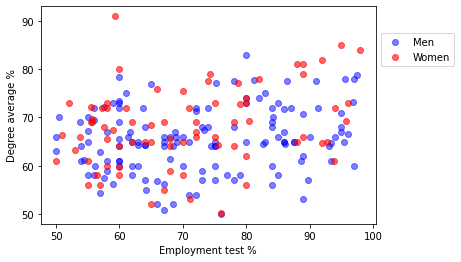

In [24]:
plt.scatter(men['etest_p'],men['degree_p'],label='Men',c='blue',alpha=0.5)
plt.scatter(women['etest_p'],women['degree_p'],label='Women',c='red',alpha=0.6)
plt.xlabel('Employment test %')
plt.ylabel('Degree average %')
plt.legend(bbox_to_anchor=(1,0.9,0,0))
plt.show()

There is no noticeable difference between the genders in terms of either employability or average degree % to comment about. There are a few noticeable outliers that appear on both higher ends of the factors, the two female graduates that scored exceptionally high on employability test and then also high on average degree percentage,  we could see from our employability test and degree average % comparison that they are employed also.
<br>There is another one perculiar outlier, the another female graduate that has the best degree average of 91% and comparibly abysmal employability test.

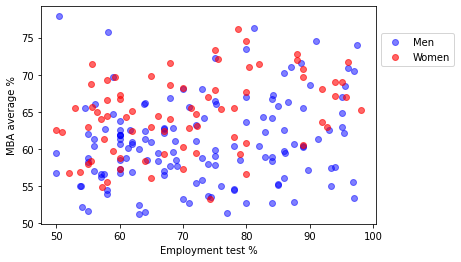

In [25]:
plt.scatter(men['etest_p'],men['mba_p'],label='Men',c='blue',alpha=0.5)
plt.scatter(women['etest_p'],women['mba_p'],label='Women',c='red',alpha=0.6)
plt.xlabel('Employment test %')
plt.ylabel('MBA average %')
plt.legend(bbox_to_anchor=(1,0.9,0,0))
plt.show()

In [26]:
np.around(women['mba_p'].mean(),2),np.around(men['mba_p'].mean(),2)

(64.64, 60.98)

Female graduates scored higher(<u>3.66% diff</u>.) MBA average % than the males. There are some perculiar outliers, the two males who scored exceptionally high in MBA average percentages but have an comparibly abysmal employment percentage. It is worth noting that from our previous employment test and mba average % comparison analysis, the one on the left is employed while the other is unemployed.

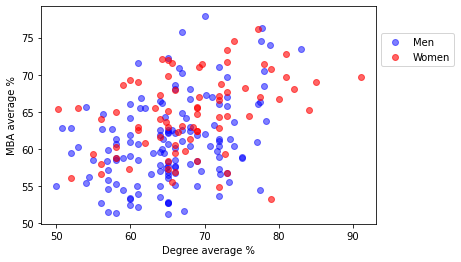

In [27]:
plt.scatter(men['degree_p'],men['mba_p'],label='Men',c='blue',alpha=0.5)
plt.scatter(women['degree_p'],women['mba_p'],label='Women',c='red',alpha=0.6)
plt.xlabel('Degree average %')
plt.ylabel('MBA average %')
plt.legend(bbox_to_anchor=(1,0.9,0,0))
plt.show()

In [28]:
np.around(men['degree_p'].mean(),2),np.around(women['degree_p'].mean(),2)

(65.43, 68.09)

In [29]:
np.unique(men['status'],return_counts=True),np.unique(women['status'],return_counts=True)

((array(['Not Placed', 'Placed'], dtype=object), array([ 39, 100])),
 (array(['Not Placed', 'Placed'], dtype=object), array([28, 48])))

We have seen previously that there is a postive linear relationship between the two factors. The best women are on average better than the best men. The men are outperformed in both factors and even though there are a lot of exceptional women than men, the men have a higher employment percentage, 71.9% compared to 63.1%.

Lastly, let us analyse <u>work experience</u>.

In [30]:
experienced = read_df[read_df['workex']=='Yes']
inexperienced = read_df[read_df['workex']=='No']

In [31]:
np.unique(experienced['status'],return_counts=True)

(array(['Not Placed', 'Placed'], dtype=object), array([10, 64]))

In [32]:
np.unique(inexperienced['status'],return_counts=True)

(array(['Not Placed', 'Placed'], dtype=object), array([57, 84]))

The division between employed and unemployed graduates in terms of work experience is hard ignore. Graduates with work experience enjoy 86.486% employment while graduates with no work experience have 59.574% employment. So far, work experience seems to be the most influencial factor.

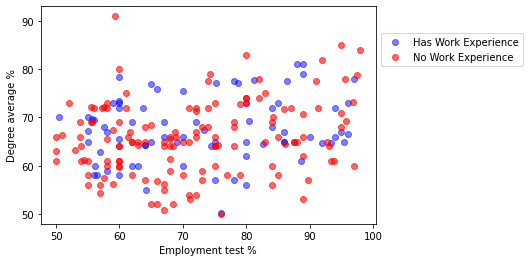

In [33]:
plt.scatter(experienced['etest_p'],experienced['degree_p'],label='Has Work Experience',c='blue',alpha=0.5)
plt.scatter(inexperienced['etest_p'],inexperienced['degree_p'],label='No Work Experience',c='red',alpha=0.6)
plt.xlabel('Employment test %')
plt.ylabel('Degree average %')
plt.legend(bbox_to_anchor=(1,0.9,0,0))
plt.show()

There is no clear relationship between the two factors but inexperienced graduates seem to be in numbers on both ends of the scale. They have graduates with exceptional degree average and also some amongst the lowest in the dataset.

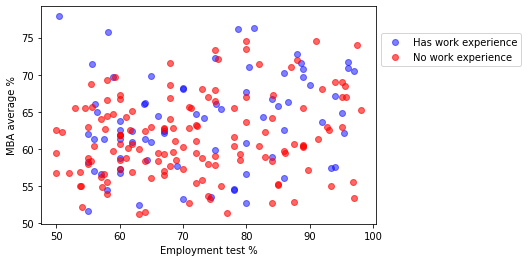

In [34]:
plt.scatter(experienced['etest_p'],experienced['mba_p'],label='Has work experience',c='blue',alpha=0.5)
plt.scatter(inexperienced['etest_p'],inexperienced['mba_p'],label='No work experience',c='red',alpha=0.6)
plt.xlabel('Employment test %')
plt.ylabel('MBA average %')
plt.legend(bbox_to_anchor=(1,0.9,0,0))
plt.show()

There is still no clear relationship and pattern between the two factors to make any comments about their effect on experience. There are a few notable graduates with experience that have the best MBA average degrees.

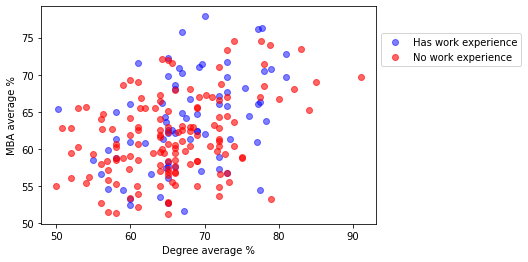

In [35]:
plt.scatter(experienced['degree_p'],experienced['mba_p'],label='Has work experience',c='blue',alpha=0.5)
plt.scatter(inexperienced['degree_p'],inexperienced['mba_p'],label='No work experience',c='red',alpha=0.6)
plt.xlabel('Degree average %')
plt.ylabel('MBA average %')
plt.legend(bbox_to_anchor=(1,0.9,0,0))
plt.show()

There is no relationship again, between the two factors. One thing to note is the graduates with the highest degree percentages have no experience at all, they are definitely recent graduates because we have seen previously that the best graduates will get placed.

So far, we found that work experience is the most influencial factor when it comes to employment.

In [36]:
np.unique(read_df['specialisation'])

array(['Mkt&Fin', 'Mkt&HR'], dtype=object)

The missing salary values are for the unemployed people, and are not a concern because our feature of interest for now is employment status and what influences it. 

Let us try to answer the <u>third question</u> first.

In [37]:
spec_mktfin = read_df[read_df['specialisation']=='Mkt&Fin']
spec_mkthr = read_df[read_df['specialisation']=='Mkt&HR']

We will analyse the  rate of employment, mean salary to try and answer question 3.

<h3>Marketing and Finance specialisation</h3>

In [38]:
spec_mktfin['salary'].mean()

298852.63157894736

In [39]:
np.unique(spec_mktfin['status'],return_counts=True)

(array(['Not Placed', 'Placed'], dtype=object), array([25, 95]))

The mean salary per annum is 298,852.63, and there is 79.167% employment for marketing and finance specialists.

<h3>Marketing and HR</h3>

In [40]:
spec_mkthr['salary'].mean()

270377.358490566

In [41]:
np.unique(spec_mkthr['status'],return_counts=True)

(array(['Not Placed', 'Placed'], dtype=object), array([42, 53]))

The mean salary per annum is 270,377.36, about 28,475.27 less than marketing and finance specialists.
Employment is an abysmal 55.789%. It is clear which of the two has more demand by corporate.


3. Which degree specialisation is much demanded by corporate? <u>Marketing and Finance</u> specialists have more demand.

Let us answer question 1 next because the steps we would take to answer it precede the ones to answer the second question.

# Machine Learning

First let us import necessary libraries and relevant classes.

In [42]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile,RFE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import NMF

In [43]:
X,y = read_df.drop(columns=['status','salary'],axis=1),read_df['status']

Split the data and encode it.

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [45]:
X_train = pd.get_dummies(X_train,columns=['hsc_s','degree_t','gender','ssc_b','hsc_b','workex','specialisation'])
X_test = pd.get_dummies(X_test,columns=['hsc_s','degree_t','gender','ssc_b','hsc_b','workex','specialisation'])
col_names = X_train.keys()

Standardise the input data using MinMaxScaler and then use LabelBinarizer to binarise the outcomes.

In [46]:
mms = MinMaxScaler()

In [47]:
mms.fit(X_train)
X_train_mm = mms.transform(X_train)

In [48]:
X_test_mm = mms.transform(X_test)

In [49]:
lb = LabelBinarizer()

lb.fit(y_train)
y_train = lb.transform(y_train)

y_test = lb.transform(y_test)

In [50]:
select = SelectPercentile()

In [51]:
select.fit(X_train_mm,y_train)

/home/slyson/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectPercentile()

In [52]:
feature_scores = select.scores_

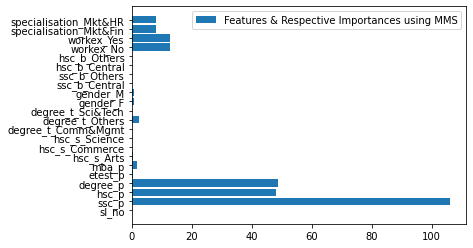

In [53]:
plt.barh(col_names,feature_scores,label='Features & Respective Importances using MMS')
plt.legend()
plt.show()

This outcome is very much unexpected. The two of the most important features are the ones that I did not individually analyse, high school and primary school.

To be confident with these results, I am going to use another scaler(SS). 

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X_train)
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

In [56]:
select.fit(X_train_ss,y_train)
ss_scores = select.scores_

/home/slyson/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


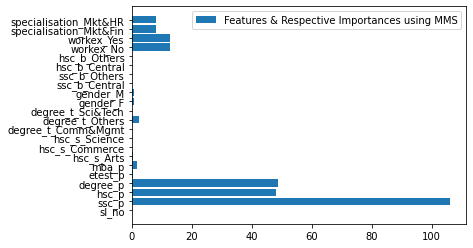

In [57]:
plt.barh(col_names,ss_scores,label='Features & Respective Importances using MMS')
plt.legend()
plt.show()

The results hold, so the scaling is irrelevant, in this particular case, at least.

<h3>We will answer the following questions.</h3>

    1. Which factor influenced a candidate in getting placed? 
           A: Secondary education percentage was the most influential.
           
    2. Does percentage matters for one to get placed?
           A: Yes, very much so. The most influential factors were secondary school, degree and then higher secondary percentages, respectively.
    
    3. Which degree specialisation is much demanded by corporate? 
           A: Marketing and Finance specialists have more demand.

I did not expect these results, I believed work experience was mostly influential, and then secondary school percentages, but I am always happy to have my views completely overturned by machine learning.

This marks the end of the project, Thank you.
<br>MS, Legodi.